# 11110EE466000 Introduction of Reinforcement Learning Exam 3

Scoring rule:

Most of the rules are the same as the last exam.

<font color=#FF0000>

ONLY modify your code in the comment block to ensure your functions can be tested correctly.

##Required functions and library
Please run the following cells first.

In [3]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import sqrt
from collections import defaultdict
from matplotlib.table import Table

In [4]:
def moving_averages(a):
  return [np.average(a[i:i+20]) for i in range(len(a)-19)]

## Problem1 variables

You may add new variables here, but do not modify the order in ACTIONS.

In [2]:
GAMMA = 1
ALPHA = 0.1
EPSILON = 0.1
n = 5
k = 0.01
WORLD_SIZE = 6
S0 = [5, 4]
ST = [0, 5]
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

##Problem1(40%): Comparing Q-learning, dyna-Q and dyna-Q+ in a nonstationary environment

In this problem, you will first implement a grid world environment that changes over time. And then write algorithms for each method to compare them.



###1.1(10%): Build the environment

As shown in figure below, the envirment is a 6x6 grid world.

Initially, all the colored states are obstacles, meaning that the agent cannot enter these states.

However, the blue state (3,5) will become a legal path after the $500^{th}$ episode is reached.

(episode 0 to 499: obstacle; episode 500 to 999: path)

The agent can choose the four actions: left, up, right and down. 

Moving into the obstacles or out of the boarder will cause the agent to stay in place.

Every transition yields a reward of -1.

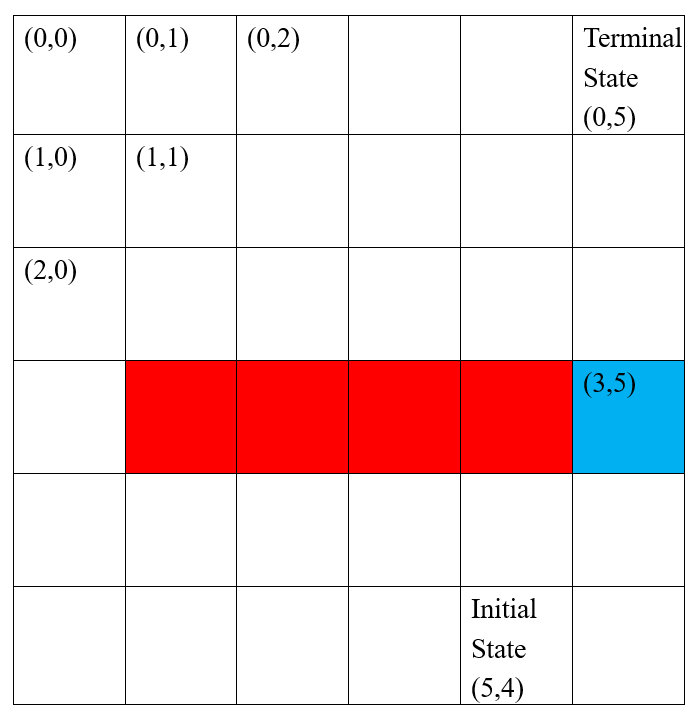

For example, 


input = [2, 1], ACTIONS[0], 200

output = [[2, 0], -1]

---
input = [1, 5], ACTIONS[2], 600

output = [[1, 5], -1]

---
input = [2, 5], ACTIONS[3], 499

output = [[2, 5], -1]

---
input = [2, 5], ACTIONS[3], 500

output = [[3, 5], -1]

---
input = [4, 5], ACTIONS[1], 499

output = [[4, 5], -1]

---
input = [4, 5], ACTIONS[1], 500

output = [[3, 5], -1]



In [14]:
def step(state, action, episode):
  ###coed block###
  if episode <500:
    WALL= [[3,i] for i in range(1,6)]
  else:
    WALL =  [[3,i]for i in range(1,5)]
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,5),np.clip(state_n[1],0,5)]
  state_n = state if state_n in WALL else state_n
  ################
  return [state_n, -1]

####Test your function


In [15]:
print(step([2,1], ACTIONS[0], 200))
print(step([1,5], ACTIONS[2], 600))
print(step([2,5], ACTIONS[3], 499))
print(step([2,5], ACTIONS[3], 500))
print(step([4,5], ACTIONS[1], 499))
print(step([4,5], ACTIONS[1], 500))


[[2, 0], -1]
[[1, 5], -1]
[[2, 5], -1]
[[3, 5], -1]
[[4, 5], -1]
[[3, 5], -1]


####$\epsilon$-greedy action selection

You will use this function for the following algorithms.

In [20]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(qtable.shape[2])

###1.2(10%): Q-learning

Using the environment in 1.1, please implement Q-learning with $\gamma=1 $, $\alpha=0.1$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [53]:
def Q_learning():
  ###coed block###
  qtable = np.zeros([6, 6, 4])
  returns = []
  for episode in range(1000):
    epsilon = EPSILON
    state = S0
    G = 0
    while state != ST:
      action = chooseAction(state, qtable, epsilon)
      state_n, reward = step(state, ACTIONS[action], episode)
      qtable[state[0], state[1], action] += ALPHA * (
              reward + GAMMA * np.max(qtable[state_n[0], state_n[1]]) - qtable[state[0], state[1], action])
      state = state_n
      G += reward
    returns.append(G)
    
  ################
  return returns

####test

Please make sure your code can run properly; you can check your correctness in the 'Comparison' section.

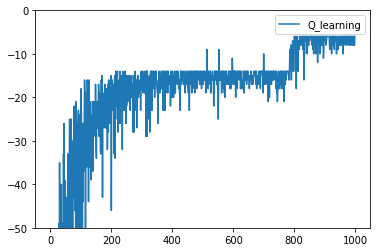

In [54]:
plt.figure()
plt.plot(Q_learning(),label='Q_learning')
plt.ylim(-50, 0)
plt.legend()
plt.show()

###1.3(10%): dyna-Q

Using the environment in 1.1, please implement dyna-Q with $\gamma=1 $, $\alpha=0.1$, $n=5$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [55]:
def dyna_Q():
  ###coed block###
    qtable = np.zeros([6, 6, 4])
    model = defaultdict(dict)
    returns = []
    for episode in range(1000):
        #### your code here ######
        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:
            action=chooseAction(state,qtable,epsilon)
            state_n,reward=step(state,ACTIONS[action],episode)
            qtable[state[0],state[1],action]=qtable[state[0],state[1],action]+ALPHA*(reward+GAMMA*np.max(qtable[state_n[0],state_n[1],:])-qtable[state[0],state[1],action])
            model[(state[0],state[1])][action]=[reward,(state_n[0],state_n[1])]
            for i in range(5):
              S=rd.permutation(list(model))[0]
              act=rd.permutation(list(model[(S[0],S[1])]))[0]
              temp=model[(S[0],S[1])][act]
              r=temp[0]
              qtable[S[0],S[1],act]=qtable[S[0],S[1],act]+ALPHA*(r+GAMMA*np.max(qtable[temp[1][0],temp[1][1],:])-qtable[S[0],S[1],act])
            state = state_n
           
            G += reward
        returns.append(G)
        ##########################
    return returns
  ################
    

####test

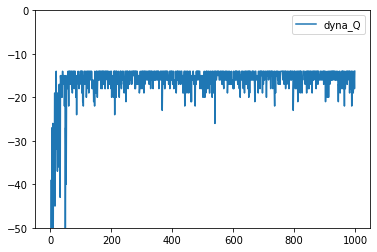

In [56]:
plt.figure()
plt.plot(dyna_Q(),label='dyna_Q')
plt.ylim(-50, 0)
plt.legend()
plt.show()

###1.4(10%): dyna-Q+

Using the environment in 1.1, please implement dyna-Q+ with $\gamma=1 $, $\alpha=0.1$, $\epsilon=0.3$, $n=5$ and $\kappa=0.01$ over 1000 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [57]:
def dyna_Q_plus():
  ###coed block###
    qtable = np.zeros([6, 6, 4])
    kappa=0.01
    model = defaultdict(dict)
    model_visit = np.zeros([6, 6, 4])
    returns = []
    t_table = np.zeros([6, 6, 4])
    t = 0
    for episode in range(1000):
        #### your code here ####
        epsilon = EPSILON
        state = S0
        G = 0
        while state != ST:
            action=chooseAction(state,qtable,epsilon)
            state_n,reward=step(state,ACTIONS[action],episode)
            qtable[state[0],state[1],action]=qtable[state[0],state[1],action]+ALPHA*(reward+GAMMA*np.max(qtable[state_n[0],state_n[1],:])-qtable[state[0],state[1],action])
            model[(state[0],state[1])][action]=[reward,(state_n[0],state_n[1])]
            model_visit[state[0],state[1],action] = 1
            t_table += 1
            t_table[state[0],state[1],action]=0
            for i in range(5):
              S=rd.permutation(list(model))[0]
              act=rd.randint(4)
              if model_visit[S[0],S[1],act] == 0:
                temp=[0,(S[0],S[1])]
              else:
                temp=model[(S[0],S[1])][act]
              r=temp[0]+kappa*(np.sqrt(t_table[S[0],S[1],act]))
              qtable[S[0],S[1],act]=qtable[S[0],S[1],act]+ALPHA*(r+GAMMA*np.max(qtable[temp[1][0],temp[1][1],:])-qtable[S[0],S[1],act])
            #print(t_table)
            state = state_n
            G += reward
            
        returns.append(G)
        ##########################

    return returns
  ################

####test

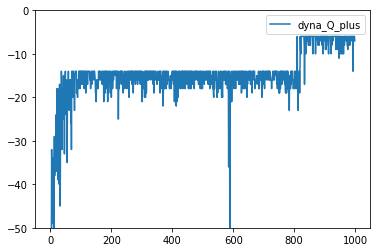

In [58]:
plt.figure()
plt.plot(dyna_Q_plus(),label='dyna_Q_plus')
plt.ylim(-50, 0)
plt.legend()
plt.show()

###Comparison
You can check your correctness in this part.

Uncomment the lines below after you finish them.

This will take about 1.5 minutes to run.

The results:

1. Dyna_Q and dyna_Q+ will learn faster than Q-learning in the beginning.

2. Dyna_Q+ and Q-learning are more likely to find the new path after the environment changes.


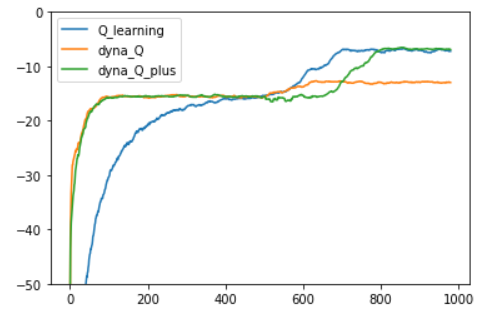

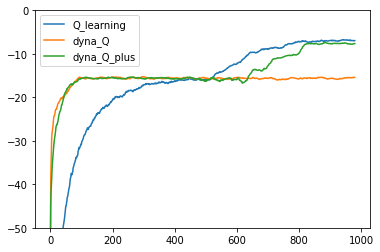

In [59]:
plt.figure()
plt.plot(np.average([moving_averages(Q_learning()) for i in range(10)],axis=0),label='Q_learning')
plt.plot(np.average([moving_averages(dyna_Q()) for i in range(10)],axis=0),label='dyna_Q')
plt.plot(np.average([moving_averages(dyna_Q_plus()) for i in range(10)],axis=0),label='dyna_Q_plus')
plt.ylim(-50, 0)
plt.legend()
plt.show()

## Problem2(60%)  

Consider an environment having a continuous state from 0 to 1($\ 0\leq s <1 $). If the state is smaller than 0 , greater or equal to 1, the episode will be terminated. 

In each episode agent will start from an initial state, which has a Gaussian distribution with mean of 0.5 and standard deviation of 0.01.
The agent has two actions to choose: A=+0.01 and A=-0.01; each action is chosen with equal probability, and the agent transitions  to S<-S+A.

If next state is smaller than 0, the agent gets a reward of -1;
If the next state is greater than 1, the agent gets a reward of 1;
otherwise, the agent gets a reward of 0.


Please estimate the value function.
Use state aggregation as function approximator.
Use SGD as the update rule.

Use the following parameters:

Learning rate = 0.01

discounted rate =1.0

number of episodes = 1000

### 2.1(10%) discretization:

  return 0 if $\ 0.0\leq s <0.1 $

  return 1 if $\ 0.1\leq s <0.2 $

  ...

  return 9 if $\ 0.9\leq s <1.0 $



**For example**


input = 0.0

output =0

---
input = 0.01

output = 0

---
input = 0.1

output = 1

---
input = 0.19

output = 1

---
input = 0.8

output = 8

---
input = 0.9

output = 9

In [102]:
rd.randint(2)

0

In [120]:
alpha=0.1
tiling1 = np.zeros(10)

In [159]:
def s2idx(s):
  ###coed block###
  idx1=0
  for i in range(10):
    if s>=0.1*i and s<0.1*(i+1):
      idx1=i
  ################
  return idx1

####Test your function

In [62]:
print([s2idx(s) for s in [0,0.01,0.1,0.19,0.8,0.9]])

[0, 0, 1, 1, 8, 9]


### 2.2(5%) evaluate state value:

Use your approximator to evaluate state value.

In [151]:
def v(s):
  ###coed block###
  state_value = tiling1[s2idx(s)]
  ################
  return  state_value

### 2.3(10%) SGD update rule:

Update your function approximator in the following function

In [153]:
def update_v(s,r,s_):
  ###coed block###
  coded_state = s2idx(s)
  tiling1[coded_state] += alpha * (r+v(s_)- v(s))

  
  ################

### 2.4(10%) result

Complete the environment and then update the state value to get the similiar result.

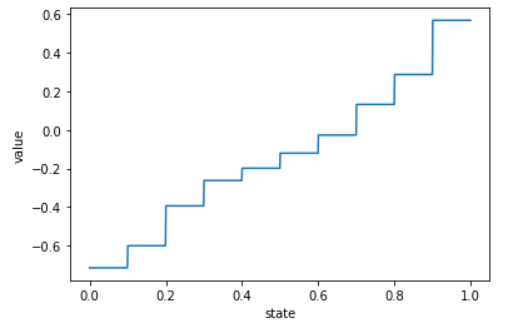

In [160]:
###coed block###
def step(state, action):
    if action==0:
      state+=0.01
    else:
      state-=0.01
    if state>1:
      reward=1
    elif state<0:
      reward=-1
    else:
      reward=0
    return state,reward
for episode in range(1000):
    state = np.random.normal(0.5,0.01)
    G = 0
    while state > 0 and state<1:
      action = rd.randint(2)
      state_next, reward = step(state, action)
      update_v(state,reward,state_next)
      state = state_next
################

Text(0, 0.5, 'value')

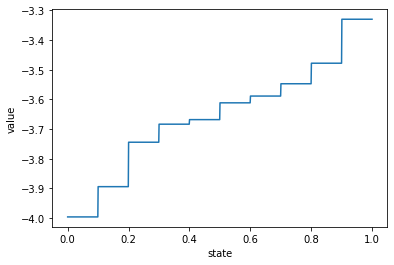

In [161]:
from matplotlib import pyplot as plt
x = np.linspace(0.0000,0.9999,1000)
y = [v(xi) for xi in x]
plt.plot(x,y)
plt.xlabel("state")
plt.ylabel("value")

###2.5(10%) discretization of 2 tilings

In tiling1:

  return 0 if $\ 0.0\leq s <0.2 $

  return 1 if $\ 0.2\leq s <0.4 $

  ...

  return 4 if $\ 0.8\leq s <1.0 $

----------------------------------------------------
In tiling2:

  return 0 if $\ -0.1\leq s <0.1 $

  return 1 if $\ 0.1\leq s <0.3 $

  ...

  return 4 if $\ 0.7\leq s <0.9 $

  return 5 if $\ 0.9\leq s <1.1 $

  
**For example**


input = 0.0

output =[0,0]

---
input = 0.19

output = [0,1]

---
input = 0.2

output = [1,1]

---
input = 0.7

output = [3,4]

---
input = 0.8

output = [4,4]

---
input = 0.9

output = [4,5]

In [162]:
import numpy as np
alpha=0.1
tiling1 = np.zeros(5)
tiling2 = np.zeros(6)

In [163]:
def s2idx_2(s):
  ###coed block###
  for i in range(5):
    if s>=0.2*i and s<0.2*(i+1):
      idx1=i
  
  for i in range(6):
    if int(s*10)>=int((0.2*i-0.1)*10) and int(s*10)<int((0.2*(i+1)-0.1)*10):
      idx2=i
  ################
  return [idx1,idx2]

####Test your function

In [149]:
print([s2idx_2(s) for s in [0,0.19,0.2,0.7,0.8,0.91]])

[[0, 0], [0, 1], [1, 1], [3, 4], [4, 4], [4, 5]]


### 2.6(5%) evaluate state value using 2 tilings:
Use your approximator to evaluate state value

In [ ]:
def v_2(s):
  ###coed block###
  idx=s2idx(s)
  state_value = tiling1[idx[0]]+tiling2[idx[1]]
  ################
  return state_value

### 2.7(10%) SGD update rule using 2 tilings:

Update your function approximator in following function

In [ ]:
def updete_v_2(s,r,s_):
  ###coed block###
  coded_state = s2idx(s)
 
  tiling1[coded_state] += alpha * (r+v(s_)- v(s))
  tiling2[coded_state] += alpha * (r+v(s_)- v(s))
  ################

def update_v(s,r,s_):
  ###coed block###
  


### 2.8(10%) result of 2 tilings:
Complete the environment and then update the state value to get the similiar result.

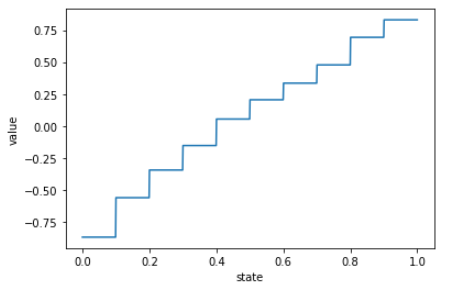

In [ ]:
def reward(s_):
###coed block###

################
  return


for epi in range(1000):
  ###coed block###

  ################


In [ ]:
from matplotlib import pyplot as plt
x = np.linspace(0.0,0.9999,1000)
y = [v_2(xi) for xi in x]
plt.plot(x,y)
plt.xlabel("state")
plt.ylabel("value")